## Linear Regression¶


# Linear Regression

It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

It is represented by an equation Y=a+b*X + e, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).

In [22]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [23]:
# read data into a DataFrame
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [24]:
# print the shape of the DataFrame

data.shape

(200, 4)

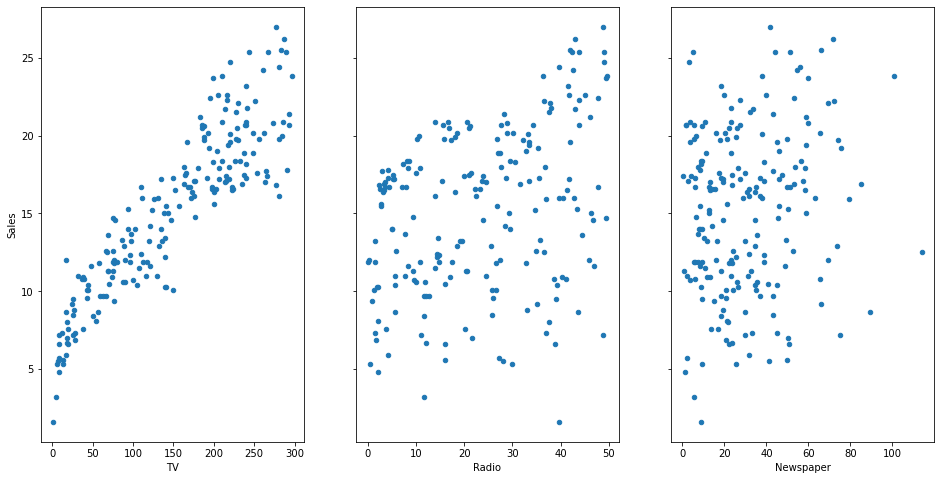

In [25]:
# visualize the relationship between the features and the response using scatterplots

fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Simple Linear Regression

Simple Linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


# Estimating ("Learning") Model Coefficients
/
Generally speaking, coefficients are estimated using the least squares criterion, which means we find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

<img src="images/08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The red lines are the **residuals**, which is the distance between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="images/08_slope_intercept.png">

### The mathematics behind the Least Squares Method.

Take a quick look at the plot created. Now consider each point, and know that each of them have a coordinate in the form (X,Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distanace between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:

                         𝐷21+𝐷22+𝐷23+𝐷24+....+𝐷2𝑁

So how do we find this line? The least-square line approximating the set of points:

            (𝑋,𝑌)1,(𝑋,𝑌)2,(𝑋,𝑌)3,(𝑋,𝑌)4,(𝑋,𝑌)5,
 
has the equation:
                      𝑌=𝑎0+𝑎1𝑋
 
this is basically just a rewritten form of the standard equation for a line:

                              𝑌=𝑚𝑥+𝑏

We can solve for these constants a0 and a1 by simultaneously solving these equations:
     
       Σ𝑌=𝑎0𝑁+𝑎1Σ𝑋
 
      Σ𝑋𝑌=𝑎0Σ𝑋+𝑎1Σ𝑋2

## scikit-learn

In [26]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

6.9748214882298925
[0.05546477]


## Interpreting Model Coefficients
How do we interpret the TV coefficient ( 𝛽1 )?

* A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
* Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales,  𝛽1  would be negative.

In [27]:
# manually calculate the prediction
6.97482148682298925 + 0.05546477*78

11.30107354682299

In [28]:
# you have to create a DataFrame since the Statsmodels formula interface expects it

X_new = pd.DataFrame({'TV': [100]})
X_new.head()

,TV
0,100


In [29]:
# use the model to make predictions on a new value

lm.predict(X_new)

array([12.52129854])

## Plotting the Least Squares Line
Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [30]:
# create a DataFrame with the minimum and maximum values of TV

X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [31]:
# make predictions for those x values and store them

pritha = lm.predict(X_new)
print(pritha)

[ 7.01364683 23.41457946]


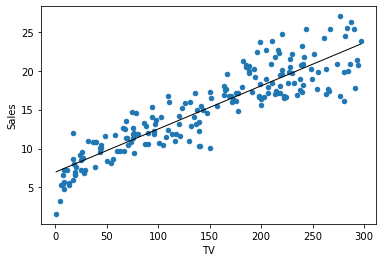

In [32]:
# first, plot the observed data

data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, pritha, c='black', linewidth=1)

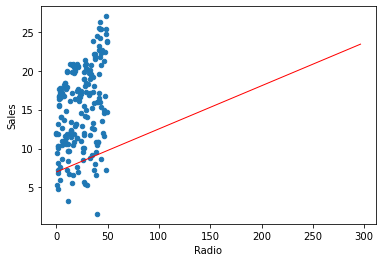

In [33]:
data.plot(kind = 'scatter',x='Radio',y= 'Sales')

plt.plot(X_new,pritha,c='Red',linewidth=1)

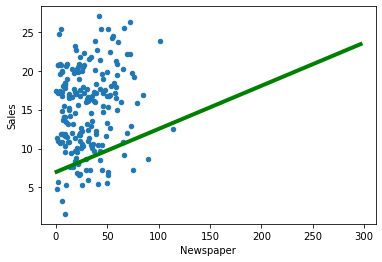

In [34]:
data.plot(kind = 'scatter',x='Newspaper',y= 'Sales')

plt.plot(X_new, pritha, c='Green',linewidth=4)


In [35]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


## Hypothesis Testing and p-values

In [36]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="images/08_r_squared.png">

In [16]:
# print the R-squared value for the model

lm.rsquared

0.8121757029987414

# Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

     𝑦=𝛽0+𝛽1𝑥1+...+𝛽𝑛𝑥𝑛 
Each  𝑥  represents a different feature, and each feature has its own coefficient. In this case:

     𝑦=𝛽0+𝛽1×𝑇𝑉+𝛽2×𝑅𝑎𝑑𝑖𝑜+𝛽3×𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟 
Let's use Statsmodels to estimate these coefficients:

In [17]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [18]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           8.13e-99
Time:                        06:32:09   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:

lm = smf.ols(formula = 'Sales ~ TV+Radio',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 20 Nov 2020   Prob (F-statistic):          2.39e-100
Time:                        06:32:10   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lm = smf.ols(formula = 'Sales ~ TV+Newspaper',data=data).fit()
lm.conf_int()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     460.0
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           5.89e-75
Time:                        06:32:11   Log-Likelihood:                -442.70
No. Observations:                 200   AIC:                             891.4
Df Residuals:                     197   BIC:                             901.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2347      0.375     16.607      0.000       5.494       6.975
TV             0.0551      0.002     29.869      0.000       0.051       0.059
Newspaper      0.0260      0.007      3.579      0.000       0.012       0.040
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.096
Skew:                           0.046   Prob(JB):                        0.953
Kurtosis:                       3.055   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
lm = smf.ols(formula = 'Sales ~ Radio+Newspaper',data=data).fit()
lm.conf_int()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.89
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           2.28e-06
Time:                        06:32:13   Log-Likelihood:                -603.03
No. Observations:                 200   AIC:                             1212.
Df Residuals:                     197   BIC:                             1222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0607      0.728     16.556      0.000      10.624      13.497
Radio          0.1195      0.025      4.708      0.000       0.069       0.170
Newspaper      0.0095      0.017      0.548      0.585      -0.025       0.044
==============================================================================
Omnibus:                       11.760   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.377
Skew:                          -0.434   Prob(JB):                      0.00920
Kurtosis:                       2.389   Cond. No.                         92.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# only include TV and Radio in the model

lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.9025896186081139

In [23]:
# add Newspaper to the model (which we believe has no association with Sales)

lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.9025912899684558